# Интерполяция

[Wikipedia](https://en.wikipedia.org/wiki/Interpolation)

Задача интерполяции - построить достаточно гладкую кривую, которая гарантированно проходит через заданные точки.

Дано: точки $(x_1, y_1), (x_2, y_2), ... (x_n, y_n)$

Найти: уравнение кривой, которая проходит через все эти точки и достаточно гладкая (например, непрерывна функция, ее первая и вторая производные).

### Термины

Рассмотрим систему несовпадающих точек $x_i$ (i = 1..N).

Пусть значения функции φ известны только в этих точках: $y_i = φ(x_i)$, i = 1..N

Задача интерполяции состоит в поиске такой функции F из **заданного класса функций** , что

$$F(x_i) = y_i, \text{при } i=1..N$$

* точки $x_i$ называют **узлы интерполяции**
* пары $(x_i, y_i)$ называют точками данных или **базовыми точками** .
* Разность между соседними значениями $dx_i = x_i - x_{i-1}$ это **шаг интерполяционной сетки** . Он может быть как переменным, так и постоянным.
* Функция F(x) - **интерполирующая функция** или **интерполянт**

### Где нужно решать эту задачу?¶

Пусть у вас есть деталь ракеты или другого сложного устройства. Вы хотите изготовить такую же. Для этого на автоматическом станке С ЧПУ нужно задать форму, по которой будет обтачиваться деталь. Шаг задания кривой должен быть очень маленький. Реальные замеры идут с большим шагом. Нужно по нескольким замерам построить набор точек с гораздо меньшим шагом (в 100-1000 раз меньше).
![](https://si-3.ru/wp-content/uploads/2019/07/tokarnyj-po-metallu_19.jpg)

## Теория: как решать задачу интерполяции

Как решать? Попробуем провести через заданные точки кривую. Какую кривую можно точно провести через n точек?

Будем искать кривую в виде степенного полинома $f(x) = a_0 + a_1 x + a_2 x^2 + ... + a_k x^k$. Полином какой степени нужен?

* Возьмем 1 точку $(x_1, y_1)$ . Через нее проходит 1 горизонтальная прямая $y = y_1$ и много прямых вида $a_0 + a_1 x$.

_Тут должен быть рисунок_

* Возьмем 2 точки $(x_1, y_1)$ и $(x_2, y_2)$. Через них проходит 1 прямая $a_0 + a_1 x$ и много парабол вида $a_0 + a_1 x + a_2 x^2$.

_Тут должен быть рисунок_

* Возьмем 3 точки $(x_1, y_1)$,  $(x_2, y_2)$ и  $(x_3, y_3)$. Через них проходит 1 парабола (если они не лежат на 1 прямой) и много кубических функций вида $a_0 + a_1 x + a_2 x^2 + a_3 x^3$.

_Тут должен быть рисунок_

Обобщим:

* Возьмем $n$ точек $(x_1, y_1)$,  $(x_2, y_2)$ ..  $(x_n, y_n)$. 
* Через них проходит 1 функция вида $a_0 + a_1 x + a_2 x^2 +..+ a_{n-1} x^{n-1}$ и 
* много функций вида $a_0 + a_1 x + a_2 x^2 +..+ a_n x^n$.


Найдем коэффициенты $a_0, a_1, ..a_{n-1}$. Запишем для каждой из точек $(x_1, y_1)$,  $(x_2, y_2)$ ..  $(x_n, y_n)$ уравнения. Получим систему уравнений. Решим ее относительно $a_0, a_1, ..a_{n-1}$.

 \begin{cases}
   y_1 = a_0 + a_1 x_1 + a_2 x_1^2 +..+ a_{n-1} x_1^{n-1} &\text{точка } (x_1, y_1)\\
   y_2 = a_0 + a_1 x_2 + a_2 x_2^2 +..+ a_{n-1} x_2^{n-1} &\text{точка } (x_2, y_2)\\
   ...\\
   y_n = a_0 + a_1 x_n + a_2 x_n^2 +..+ a_{n-1} x_n^{n-1} &\text{точка } (x_n, y_n)\\
 \end{cases}


Тут $n$ уравнений и $n$ неизвестных $a_0, a_1, ..a_{n-1}$. Обычно имеется однозначное решение (если система линейно независима).

Можно вспомнить матрицы numpy и sympy. Можно вспомнить, что sympy есть функция `solve`, которая умеет решать системы уравнений. Но еще проще воспользоваться пакетом `numpy.polynomial` и функцией **fit**

## Решение задачи интерполяции степенным полиномом

Фукнцию $a_0 + a_1 x + a_2 x^2 +..+ a_n x^n$ называют степенным полиномом степени $n$. 

Для работы с полиномами в numpy есть модуль polynomial. 

Сначала нужно написать import.

In [2]:
import numpy as np
from numpy import polynomial as P     # подключаем модуль для всех полиномов

Нам даных точки х и у. Запишем их.

In [3]:
x = np.array([1, 2, 3, 4])
x

array([1, 2, 3, 4])

In [4]:
y = np.array([1, 3, 5, 4])
y

array([1, 3, 5, 4])

максимальная степень полинома - на 1 меньше, чем количество точек

In [5]:
deg = len(x) -1    # deg - степень полинома, len(x) - количество элементов в х
deg

3

Построим интерполяционный многочлен (**полиномиальный**), используя функцию **fit**.

In [6]:
f1b = P.Polynomial.fit(x, y, deg)
f1b

Polynomial([ 4.1875,  3.1875, -1.6875, -1.6875], domain=[1., 4.], window=[-1.,  1.])

### Рисуем точки и полученный полином

In [7]:
import matplotlib.pyplot as plt

In [8]:
xx = np.linspace(x.min(), x.max(), 100)     # много точек по оси Х

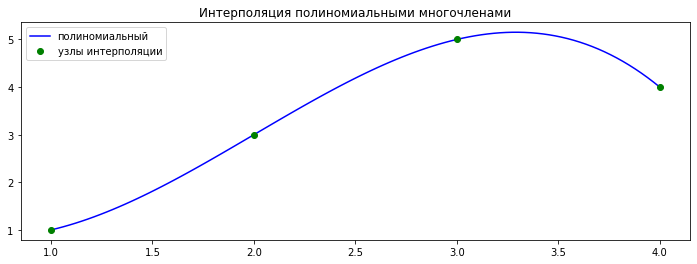

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_title('Интерполяция полиномиальными многочленами')
ax.plot(xx, f1b(xx), 'b', label='полиномиальный')
ax.plot(x, y, 'go', label='узлы интерполяции')
ax.legend()

## Теория: какие бывают полиномы (базисы функций для интерполяции)

Мы будем записывать интерполяционную функцию как линейную комбинацию некоторых базисных функций $f_j(x)$:

$$F(x) = c_1f_1(x) + c_2f_2(x) +..+ c_Nf_N(x)$$

Можно брать разные базисы функций (в базисе ни одна функция не может быть линейной комбинацией остальных функций базиса), например [ортогональные многочлены](https://en.wikipedia.org/wiki/Orthogonal_polynomials). Наиболее известные ортогональные многочлены:

* Степенные функции $1, x, x^2, .. x^N$ - решали задачу интерполяции на этом базисе
* [Многочлены Эрмита](https://en.wikipedia.org/wiki/Hermite_polynomials)
* [Многочлены Лагранжа](https://en.wikipedia.org/wiki/Legendre_polynomials)
* [Многочлены Лагера](https://en.wikipedia.org/wiki/Laguerre_polynomials)
* [Многочлены Чебышева](https://en.wikipedia.org/wiki/Chebyshev_polynomials)

Аналогично, например, можем задать многочлен Чебышева с коэффициентами 1, 2, 3, т.е. полином $1T_1+2T_2+3T_3$, где $T_i(x)$ - многочлен Чебышева порядка i

### В каком пакете реализован многочлен

| Многочлен | Пакет | Класс |
|:----|:-----|:----|
| Степенные функции $1, x, x^2, .. x^N$ | [numpy.polynomial.polynomial](https://docs.scipy.org/doc/numpy/reference/routines.polynomials.polynomial.html) | Polynomial |
| [Многочлены Чебышева](https://en.wikipedia.org/wiki/Chebyshev_polynomials) | [numpy.polynomial.chebyshev](https://docs.scipy.org/doc/numpy/reference/routines.polynomials.chebyshev.html) | Chebyshev |
| [Многочлены Лагранжа](https://en.wikipedia.org/wiki/Legendre_polynomials) | [numpy.polynomial.legendre](https://docs.scipy.org/doc/numpy/reference/routines.polynomials.legendre.html) | Legendre |
| [Многочлены Лагера](https://en.wikipedia.org/wiki/Laguerre_polynomials) | [numpy.polynomial.laguerre](https://docs.scipy.org/doc/numpy/reference/routines.polynomials.laguerre.html) | Laguerre |
| [Многочлены Эрмита](https://en.wikipedia.org/wiki/Hermite_polynomials) ("физическое" оределение) | [numpy.polynomial.hermite](https://docs.scipy.org/doc/numpy/reference/routines.polynomials.hermite.html) | Hermite |
| [Многочлены Эрмита](https://en.wikipedia.org/wiki/Hermite_polynomials) ("вероятностное" оределение) | [numpy.polynomial.hermite_e](https://docs.scipy.org/doc/numpy/reference/routines.polynomials.hermite_e.html) | HermiteE |

В каждом классе полиновом реализована функция **fit**. Она находит коэффициенты интерполяционного многочлена для своего набора базисных функций.

Решим задачу интерполяции для степенного многочлена и многочлена Чебышева.

## Решение: задача интерполяции степенным многочленом и многочленом Чебышева

In [11]:
import numpy as np
from numpy import polynomial as P     # подключаем модуль для всех полиномов

Записываем входные данные:

In [12]:
x = np.array([1, 2, 3, 4])
x

array([1, 2, 3, 4])

In [13]:
y = np.array([1, 3, 5, 4])
y

array([1, 3, 5, 4])

In [14]:
deg = len(x) -1    # deg - степень полинома, len(x) - количество элементов в х
deg

3

Проверяем, что количество х координат и y координат совпадает

In [15]:
len(x) == len(y)

True

Находим коэффициенты разложения по базисам и получаем выражения fb1 и fb2

In [16]:
f1b = P.Polynomial.fit(x, y, deg)    # степенной
f1b

Polynomial([ 4.1875,  3.1875, -1.6875, -1.6875], domain=[1., 4.], window=[-1.,  1.])

In [17]:
f2b = P.Chebyshev.fit(x, y, deg)     # Чебышева
f2b

Chebyshev([ 3.34375 ,  1.921875, -0.84375 , -0.421875], domain=[1., 4.], window=[-1.,  1.])

Рисуем график точек и двух интерополяционных многочленов (в степенном базисе и в базисе из многочленов Чебышева).

In [18]:
import matplotlib.pyplot as plt

In [19]:
xx = np.linspace(x.min(), x.max(), 100)

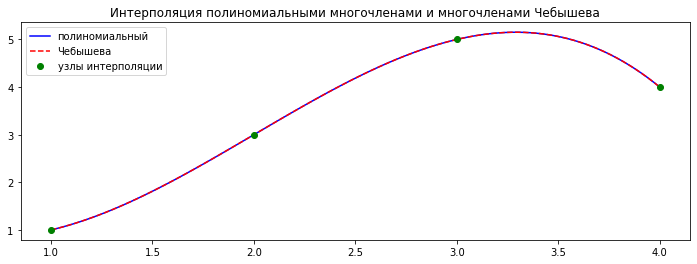

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_title('Интерполяция полиномиальными многочленами и многочленами Чебышева')
ax.plot(xx, f1b(xx), 'b', label='полиномиальный')
ax.plot(xx, f2b(xx), 'r--', label='Чебышева')
ax.plot(x, y, 'go', label='узлы интерполяции')
ax.legend()

**ЭТО НУЖНО СДЕЛАТЬ В ДОМАШНЕЙ РАБОТЕ**. Как видите, интерполяционные кривые почти совпадают.

## Когда интерполяционные многочлены дают плохой результат (пример биений на функции Рунге)

Интерполяция многочленами небольшого количества точек - мощный и полезный математический инструмент. Но если количество точек растет, то растет и наибольшая степень интерполяционного многочлена, что приводит к проблемам.

Полученная функция резко изменяется за пределами отрезка интерполяции. Но что более неприятно, полиномы высокой степени нехорошо себя ведут и между точками интерполяции. Хотя в точках значения полиномов разных степеней совпадают, но между ними начинают появляться биения.

Рассмотрим, как решается задача интерполяции уже известной функции. Как будет отличаться интерполяционная функция от оригинала.

Возьмем функцию Рунге $$y = \frac{1}{1 + 25 x^2}$$

Она достаточно гладкая на $[-1, 1]$. Интерполируем ее полиномами разной степени и посмотрим на результат.

In [4]:
# функция возвращает значение y(х)
def runge(x):
    return 1 / (1 + 25*x**2)

Проверим ее работу:

In [5]:
runge(0)

1.0

In [6]:
runge(1)

0.038461538461538464

Напишем функцию, которая создает $n$ точек на отрезке $[-1, 1]$ и строит по этим точкам интерполяционный полином степени $n-1$

In [7]:
def runge_interpolate(n):
    x = np.linspace(-1, 1, n)
    f = P.Polynomial.fit(x, runge(x), n)
    return x, f

Нарисуем графики исходной фукнции Рунге и интеполяционных многочленов 13 и 14 порядков:

C:\ProgramData\Anaconda3\lib\site-packages\numpy\polynomial\polynomial.py:1336: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


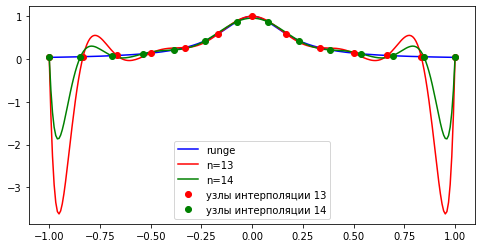

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import polynomial as P     # подключаем модуль для всех полиномов

xx = np.linspace(-1, 1, 250)     # это точки х для рисования графиков

x13, p13 = runge_interpolate(13)
x14, p14 = runge_interpolate(14)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(xx, runge(xx), 'b', label='runge')
ax.plot(xx, p13(xx), 'r', label='n=13')
ax.plot(xx, p14(xx), 'g', label='n=14')
ax.plot(x13, runge(x13), 'ro', label='узлы интерполяции 13')
ax.plot(x14, runge(x14), 'go', label='узлы интерполяции 14')

# ax.set_ylim([-1, 1])
ax.legend()

Если у вас появилось красное сообщение 
```
C:\ProgramData\Anaconda3\lib\site-packages\numpy\polynomial\polynomial.py:1336: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
```
То вас просят хорошо проверить, как интерполяционный полином интерполирует эти точки. Если хорошо, то это не ошибка. Но может быть так же плохо, как в фукнции Рунге. И вам рекоменуют понизить количество точек интерполяции.

Заметим, что самые большие биения (отклонение от оригинала) у нас по краям. Что делать? Очень большие ошибки!

## Сплайн-интерполяция

В фукнции Рунге результат интерполяции был бы с меньшими ошибками, если бы мы просто соединили соседние точки прямыми.

Если вместо прямых взять квадратные или кубические функции и сделать так, чтобы они имели непрерывные производные в точках интерполяции, то мы получим интерполяцию квадратичными (или кубическими) сплайнами.

Подробнее о математике сплайнов можно прочитать в [лекции Цыбулина](http://314159.ru/hht/splines.pdf) (МФТИ), кто не хочет много математики, может не читать.

Напишем это для 3 точек $(x_1, y_1), (x_2, y_2), (x_3, y_3)$. Эти точки даны.

Будем искать 2 прямые. Одна проходит через точки $(x_1, y_1), (x_2, y_2)$, вторая через $(x_2, y_2), (x_3, y_3)$.

Обозначим эти прямые как 
 $$\begin{matrix}
   f_1(x) = a_{10} + a_{11} x\\
   f_2(x) = a_{20} + a_{21} x\\
  \end{matrix}$$

Коэффициенты $a_{10}, a_{11}, a_{20}, a_{21}$ найдем из граничных условий. 

Прямая $f_1$ проходит через точки $(x_1, y_1), (x_2, y_2)$. Запишем это в виде системы. Из нее можно найти $a_{10}, a_{11}$

 $$\begin{cases}
   y_1 = a_{10} + a_{11} x_1  &\text{прямая f1, точка } (x_1, y_1)\\
   y_2 = a_{10} + a_{11} x_2  &\text{прямая f1, точка } (x_2, y_2)\\
\end{cases}
$$

Прямая  $f_2$  через $(x_2, y_2), (x_3, y_3)$. Запишем это в виде системы. Из нее можно найти $a_{20}, a_{21}$
$$\begin{cases}   
   y_2 = a_{20} + a_{21} x_2  &\text{прямая f2, точка } (x_2, y_2)\\
   y_3 = a_{20} + a_{21} x_3  &\text{прямая f2, точка } (x_3, y_3)\\
  \end{cases}$$

Так как $f_1$ и $f_2$ - полиномы 1 степени (линии), то эти прямые называют **линейными сплайнами** или **сплайн интерполяцией 1 порядка**.

Но прямыми соединять не хорошо. Полученная функция не имеет производной в точках интерполяции (не гладкая).

Возьмем параболы. Через 2 точки можно провести много парабол. Будем соединять 3 точки не 2 отрезками, а 2 параболами так, чтобы в средней точке у функции была производная. Более того, производная непрерывная.

Будем искать 2 параболы. Одна проходит через точки $(x_1, y_1), (x_2, y_2)$, вторая через $(x_2, y_2), (x_3, y_3)$.

Обозначим эти параболы как 
 $$\begin{matrix}
   f_1(x) = a_{10} + a_{11} x + a_{12} x^2\\
   f_2(x) = a_{20} + a_{21} x + a_{22} x^2\\
  \end{matrix}$$

Коэффициенты $a_{10}, a_{11}, a_{12} a_{20}, a_{21}, a_{22}$ найдем из граничных условий. 



Парабола $f_1$ проходит через точки $(x_1, y_1), (x_2, y_2)$. Запишем это в виде системы. Из нее можно найти $a_{10}, a_{11}, a_{12}$

 $$\begin{cases}
   y_1 = a_{10} + a_{11} x_1  &\text{прямая f1, точка } (x_1, y_1)\\
   y_2 = a_{10} + a_{11} x_2  &\text{прямая f1, точка } (x_2, y_2)\\
\end{cases}
$$

Прямая  $f_2$  через $(x_2, y_2), (x_3, y_3)$. Запишем это в виде системы. Из нее можно найти $a_{20}, a_{21}$
$$\begin{cases}   
   y_2 = a_{20} + a_{21} x_2  &\text{прямая f2, точка } (x_2, y_2)\\
   y_3 = a_{20} + a_{21} x_3  &\text{прямая f2, точка } (x_3, y_3)\\
  \end{cases}$$

Так как $f_1$ и $f_2$ - полиномы 1 степени (линии), то эти прямые называют **линейными сплайнами** или **сплайн интерполяцией 1 порядка**.